In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import seaborn as sns
import time
#import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/RecycleMates'

/content/drive/MyDrive/Colab Notebooks/RecycleMates


# 1. Importing the dataset

In [4]:
from pathlib import Path
p = Path().cwd()

In [ ]:
target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels


# Importing the data
images1 = np.load(p/"images.npy")
labels1 = np.load(p/"labels.npy")
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


# 2. Exploring the data

In [ ]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [ ]:
unique, counts = np.unique(labels_int, return_counts=True)
dict(zip(unique, counts))

{0: 1414, 1: 1021, 2: 1448, 3: 1637}

<Axes: xlabel='Object', ylabel='count'>

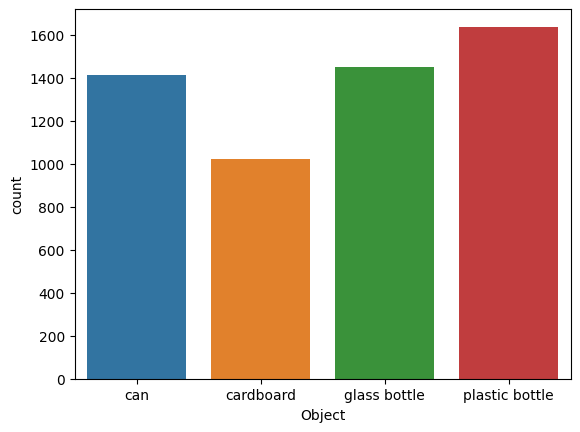

In [ ]:
objects = pd.DataFrame(labels1, columns=['Object'])
sns.countplot(x=objects["Object"])

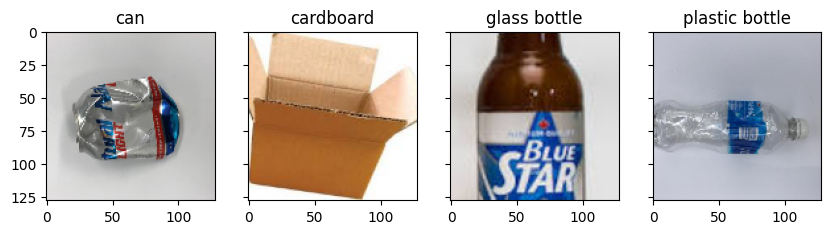

In [ ]:
import random

can_i = random_number = random.randint(1, 1414)
cardboard_i = random_number = random.randint(1415, 1414+1021)
glassbottle_i = random_number = random.randint(1414+1021, 1414+1021+1448)
plasticbottle_i = random_number = random.randint(1414+1021+1448, 1414+1021+1448+1637)

f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[can_i])
axarr[0].imshow(images1[can_i]/255)
axarr[1].set_title(labels1[cardboard_i])
axarr[1].imshow(images1[cardboard_i]/255)
axarr[2].set_title(labels1[glassbottle_i])
axarr[2].imshow(images1[glassbottle_i]/255)
axarr[3].set_title(labels1[plasticbottle_i])
axarr[3].imshow(images1[plasticbottle_i]/255)

# 3. Creating the models

In [ ]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Shape of the training dataset
X_train.shape

(4968, 128, 128, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [ ]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

## 3.1 Baseline model

In [ ]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, 2, padding = 'same', input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

In [ ]:
cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14112)             0         
                                                                 
 dense (Dense)               (None, 32)                451616    
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 452,164
Trainable params: 452,164
Non-trainable params: 0
__________________________________________________

In [ ]:

start_time = time.time()

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 11s 46ms/step - loss: 1.4882 - accuracy: 0.2864 - val_loss: 1.3838 - val_accuracy: 0.3139
Epoch 2/10
32/32 [==============================] - 1s 38ms/step - loss: 1.3828 - accuracy: 0.2901 - val_loss: 1.3818 - val_accuracy: 0.3139
Epoch 3/10
32/32 [==============================] - 1s 37ms/step - loss: 1.3811 - accuracy: 0.2901 - val_loss: 1.3800 - val_accuracy: 0.3139
Epoch 4/10
32/32 [==============================] - 1s 42ms/step - loss: 1.3794 - accuracy: 0.2901 - val_loss: 1.3783 - val_accuracy: 0.3139
Epoch 5/10
32/32 [==============================] - 1s 40ms/step - loss: 1.3780 - accuracy: 0.2901 - val_loss: 1.3774 - val_accuracy: 0.3139
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 1.3770 - accuracy: 0.2901 - val_loss: 1.3767 - val_accuracy: 0.3139
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 1.3762 - accuracy: 0.2901 - val_loss: 1.3760 - val_accuracy: 0.3139
Epoch 8/10
3

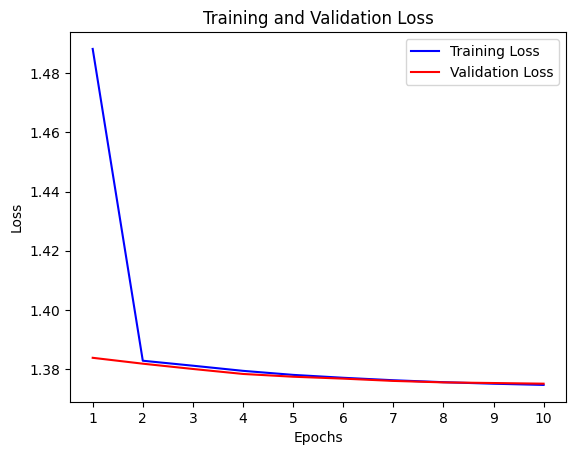

In [ ]:
history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

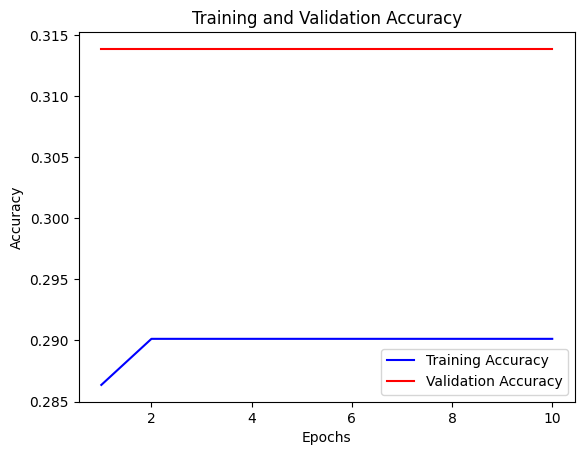

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 3.2 Second Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [ ]:
# Explore the structure of the NN
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        36928     
                                                      

In [ ]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
start_time = time.time()

history1 = model2.fit(X_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 17s 279ms/step - loss: 1.4079 - accuracy: 0.2813 - val_loss: 1.3811 - val_accuracy: 0.2555
Epoch 2/10
32/32 [==============================] - 5s 171ms/step - loss: 1.3359 - accuracy: 0.3488 - val_loss: 1.3143 - val_accuracy: 0.3410
Epoch 3/10
32/32 [==============================] - 5s 169ms/step - loss: 1.2201 - accuracy: 0.4341 - val_loss: 1.1542 - val_accuracy: 0.5171
Epoch 4/10
32/32 [==============================] - 5s 172ms/step - loss: 1.1525 - accuracy: 0.4711 - val_loss: 1.1570 - val_accuracy: 0.4769
Epoch 5/10
32/32 [==============================] - 5s 170ms/step - loss: 1.0676 - accuracy: 0.5254 - val_loss: 1.0036 - val_accuracy: 0.6046
Epoch 6/10
32/32 [==============================] - 5s 170ms/step - loss: 0.9565 - accuracy: 0.6097 - val_loss: 1.0024 - val_accuracy: 0.6157
Epoch 7/10
32/32 [==============================] - 5s 171ms/step - loss: 0.9190 - accuracy: 0.6319 - val_loss: 0.8969 - val_accuracy: 0.6680
Epoch

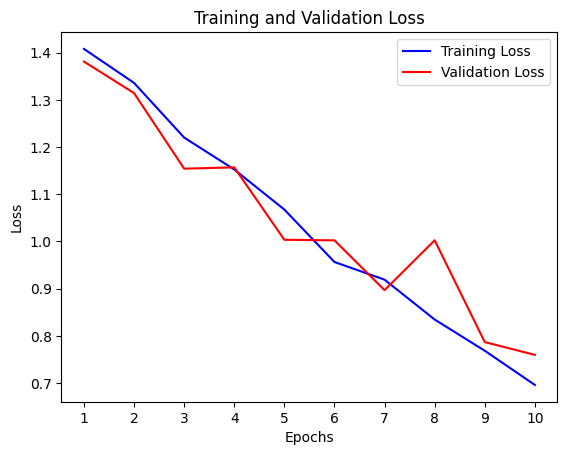

In [ ]:
history_dict = history1.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

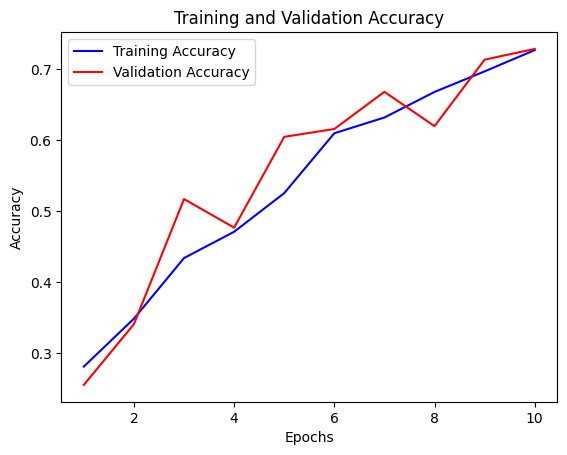

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Other model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(512, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Add fully connected layers
model3.add(Flatten())
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.25))
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.25))
model3.add(Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))


# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        36928     
                                                      

In [ ]:
model3.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0005),
              metrics =['accuracy'])

In [ ]:
# Set up training parameters
batch_size = 128
epochs = 20

# Start the timer
start_time = time.time()

# Fit the model with augmented data
history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_test, y_test))

# Calculate elapsed time
elapsed_time = time.time() - start_time

print("Training time: ", elapsed_time)

Epoch 1/20
38/38 [==============================] - 24s 615ms/step - loss: 0.1594 - accuracy: 0.9581 - val_loss: 0.2255 - val_accuracy: 0.9366
Epoch 2/20
38/38 [==============================] - 24s 635ms/step - loss: 0.1325 - accuracy: 0.9657 - val_loss: 0.2197 - val_accuracy: 0.9420
Epoch 3/20
38/38 [==============================] - 24s 641ms/step - loss: 0.1287 - accuracy: 0.9680 - val_loss: 0.2736 - val_accuracy: 0.9312
Epoch 4/20
38/38 [==============================] - 25s 660ms/step - loss: 0.1141 - accuracy: 0.9702 - val_loss: 0.2311 - val_accuracy: 0.9366
Epoch 5/20
38/38 [==============================] - 25s 646ms/step - loss: 0.1332 - accuracy: 0.9632 - val_loss: 0.2277 - val_accuracy: 0.9457
Epoch 6/20
38/38 [==============================] - 25s 642ms/step - loss: 0.1177 - accuracy: 0.9700 - val_loss: 0.2405 - val_accuracy: 0.9366
Epoch 7/20
38/38 [==============================] - 23s 592ms/step - loss: 0.1169 - accuracy: 0.9671 - val_loss: 0.2966 - val_accuracy: 0.9239

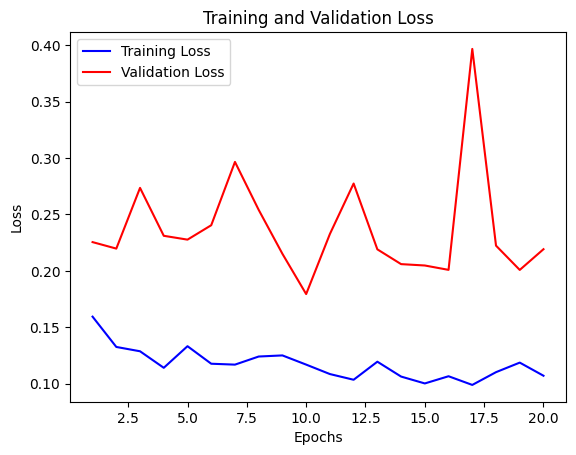

In [ ]:
history_dict = history3.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

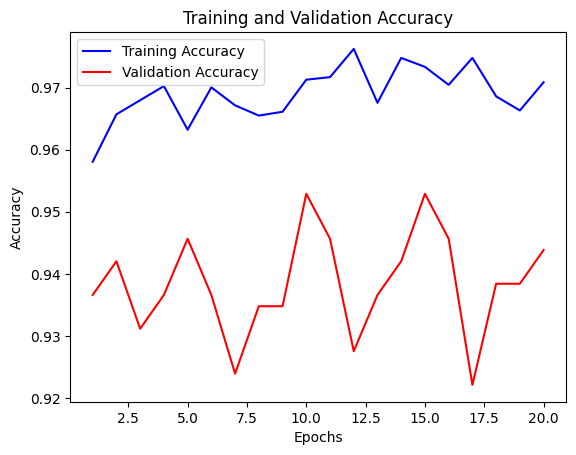

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
#plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

18/18 [==============================] - 0s 17ms/step


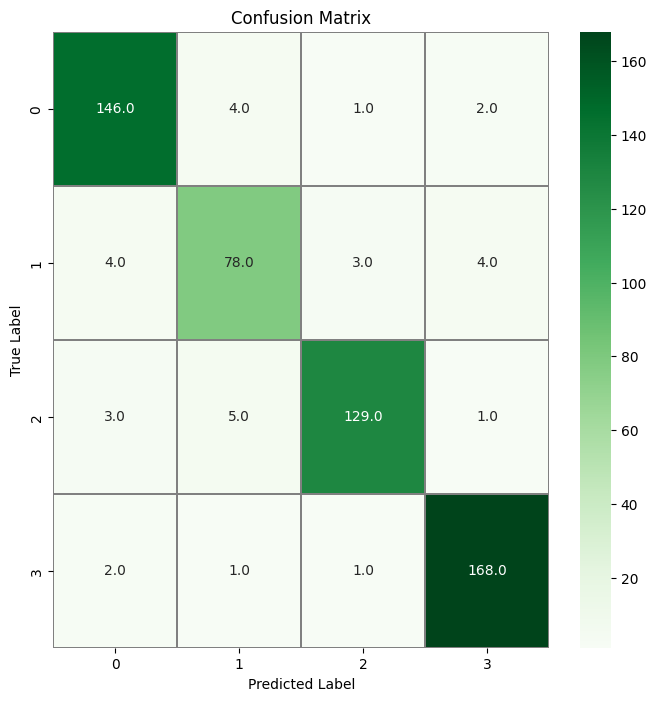

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model3.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 335ms/step


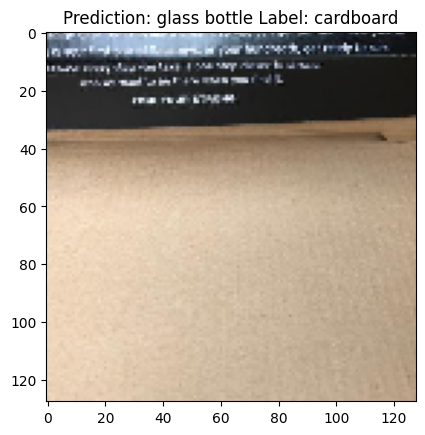

1/1 [==============================] - 0s 21ms/step


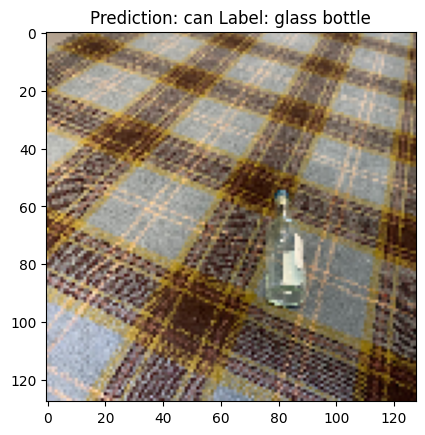

1/1 [==============================] - 0s 35ms/step


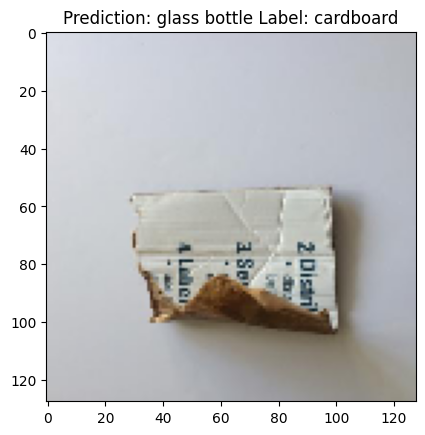

1/1 [==============================] - 0s 105ms/step


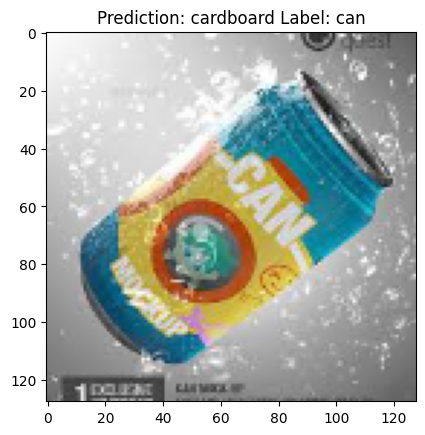

1/1 [==============================] - 0s 32ms/step


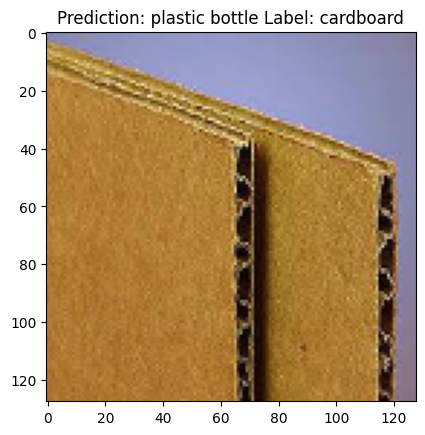

1/1 [==============================] - 0s 20ms/step


In [ ]:
class_names = ['can', 'cardboard', 'glass bottle', 'plastic bottle']

for x in range(100):
    test_image = X_test[x,:]
    predicted_cat = model3.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()

In [ ]:
model3.save(p/"model_2_94p.h5")

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('model_2_94p.h5')

# Show the model architecture
# new_model.summary()

In [ ]:
# can_test1, cardboard_test1, glass_bottle_test1, plastic_bottle_test1
img = load_img("plastic_bottle_test1.png") # load image as grayscale

In [5]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('model_2_94p.h5')


In [6]:
# can_test1, cardboard_test1, glass_bottle_test1, plastic_bottle_test1
img = load_img("plastic_bottle_test1.png") # load image as grayscale

In [18]:
def predictions(image):
    img_array = img_to_array(image) # convert the image to an NumPy array
    img_array_resized = smart_resize(img_array, size = (128, 128)) / 255.0 # if necessary, resize the image to 128 by 128
    reshaped_image = np.expand_dims(img_array_resized, axis=0) # reshape the image from (height, width, 3) to (1, height, width, 3) as an input to the CNN model
    probabilities = new_model.predict(reshaped_image)
    probabilities = np.round(probabilities[0,:],4 ) * 100
    return probabilities

def probability_chart(probabilities):
    x = np.array([0, 1, 2, 3])  # X-axis values
    labels = ['Can', 'Cardboard', 'Glass bottle', 'Plastic Bottle']  # Replace with your labels
    plt.bar(x, probabilities)
    plt.xticks(x, labels)  # Assigning labels to x-axis ticks
    plt.xlabel('Object')
    plt.ylabel('Probability')
    plt.title('Bar Chart')
    for i, value in enumerate(probabilities):
        chart = plt.text(i, value, str(value), ha='center', va='bottom')
    return plt.show()

In [19]:
prob = predictions(img)

1/1 [==============================] - 0s 19ms/step


In [20]:
prob

array([0.000e+00, 0.000e+00, 2.000e-02, 9.998e+01], dtype=float32)

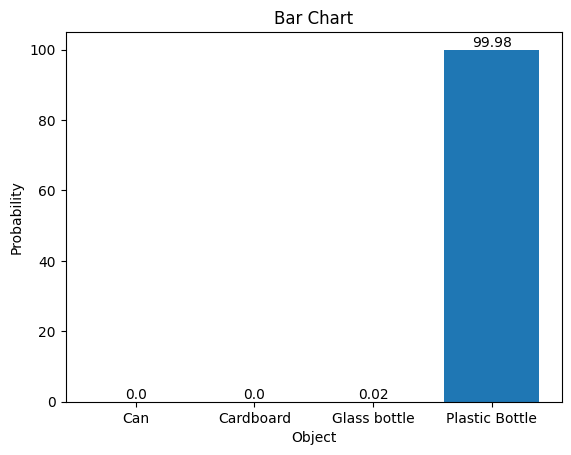

In [21]:
probability_chart(prob)